# Test read results

Must run after run_pipeline

In [1]:
from erebus.utility.h5_serializable_file import H5Serializable
import erebus.utility.utils as utils 
from uncertainties import ufloat
from erebus.photometry_data import PhotometryData
from erebus.utility.run_cfg import ErebusRunConfig
from erebus.utility.planet import Planet
from erebus.erebus import Erebus
import numpy as np
import matplotlib.pyplot as plt
from erebus.joint_fit_results import JointFitResults
from erebus.individual_fit_results import IndividualFitResults
from erebus.plotting import plot_joint_fit
from erebus.plotting import plot_fnpca_individual_fit

In [2]:
joint_fit = JointFitResults.load("./test_output/LHS1478b_joint_fit.h5")

In [3]:
print(joint_fit.results)

{'t_sec_offset': 1.2820170641089233e-05+/-0.00324198781606176, 'fp': -1.943354972648692e-06+/-5.2960854594233413e-05, 't0': 2458786.75425+/-0, 'rp_rstar': 0.0462+/-0, 'a_rstar': 16.119+/-0, 'p': 1.9495378+/-0, 'inc': 87.452+/-0, 'ecc': 0.0+/-0, 'w': 0.0+/-0, 'pc1_0': -0.042471126865271845+/-0.14905812685003647, 'pc2_0': -0.10905149033214148+/-0.11237597515179365, 'pc3_0': 0.34907309386844476+/-0.3117680500802984, 'pc4_0': -0.27434522817398177+/-0.4046375203247893, 'pc5_0': -0.5664499022107361+/-0.3566018039589663, 'exp1_0': 0.0+/-0, 'exp2_0': 0.0+/-0, 'a_0': -0.007439004275140781+/-0.0014887450447165274, 'b_0': 0.0004780335610167142+/-0.00011031084565240058, 'pc1_1': -0.7225551758593662+/-0.0590574728117953, 'pc2_1': 0.017522702692533004+/-0.14276439863366247, 'pc3_1': -0.28447174554369953+/-0.34935511020229226, 'pc4_1': 0.574754274716497+/-0.3986697823192627, 'pc5_1': -0.2073671064203079+/-0.3570645116085538, 'exp1_1': 0.0+/-0, 'exp2_1': 0.0+/-0, 'a_1': -0.001931954892766693+/-0.00181

Offset:  0.0003076840953861416 hours


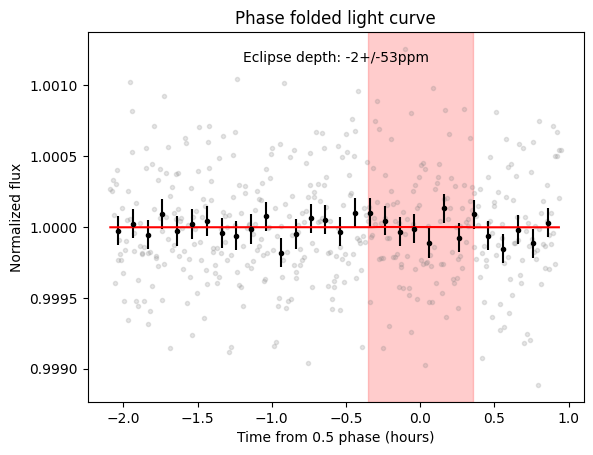

In [4]:
plot_joint_fit(joint_fit, show=True)

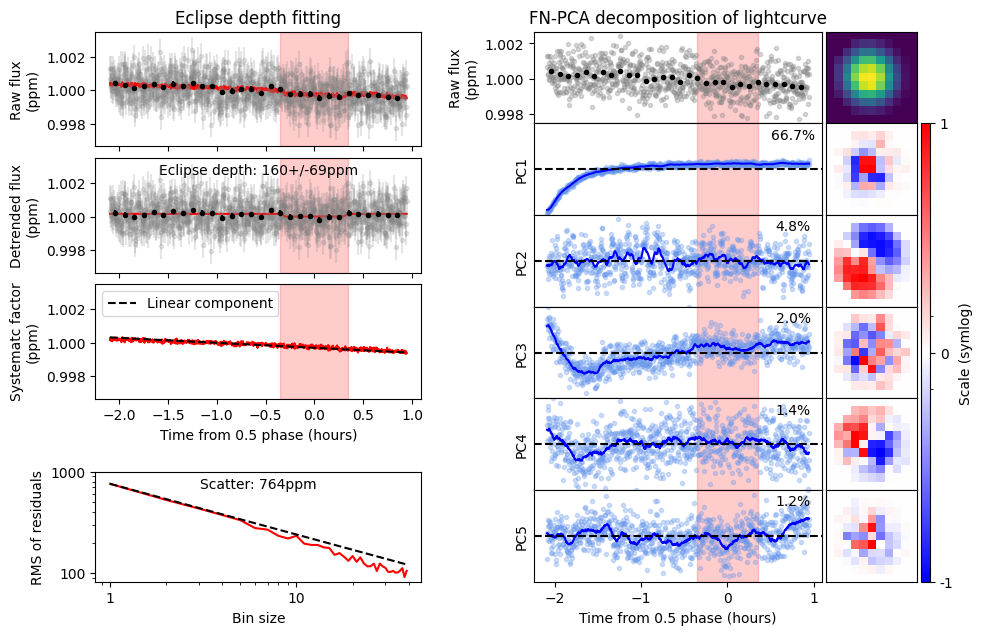

In [5]:
visit1 = IndividualFitResults.load("./test_output/LHS1478b_visit_1_jw03730013001.h5")
plot_fnpca_individual_fit(visit1, show=True)

0.08793104333977175


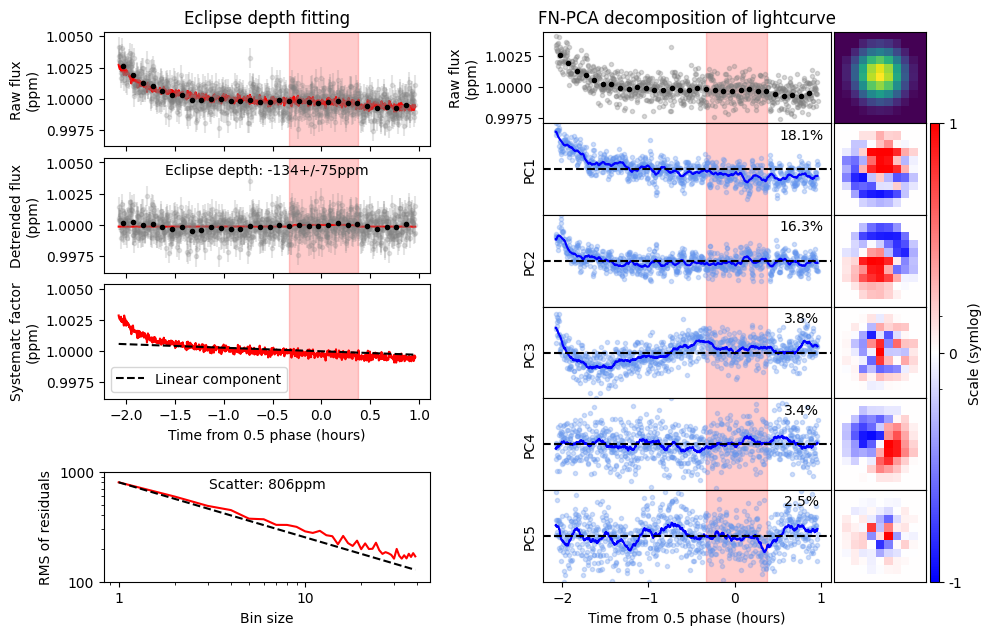

In [6]:
visit2 = IndividualFitResults.load("./test_output/LHS1478b_visit_2_jw03730012001.h5")
print(visit2.predicted_t_sec)
plot_fnpca_individual_fit(visit2, show=True)

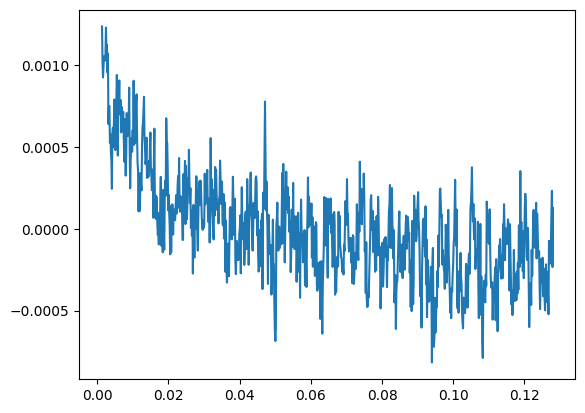

In [7]:
plt.plot(visit2.time, visit2.eigenvalues[0])
plt.show()

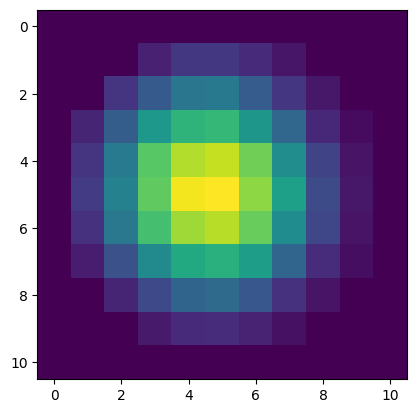

In [8]:
plt.imshow(visit1.frames[-1])

In [9]:
print(dir(visit1))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_exclude_keys', 'config_hash', 'eigenvalues', 'eigenvectors', 'flux_model', 'frames', 'load', 'load_from_path', 'order', 'pca_variance_ratios', 'planet_name', 'predicted_t_sec', 'raw_flux', 'results', 'save_to_path', 'start_time', 'systematic_factor', 'time', 'visit_name']


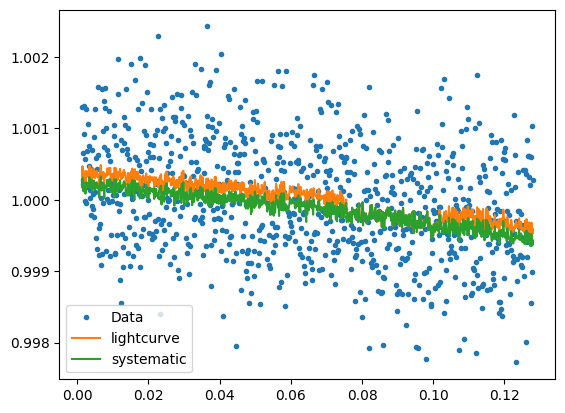

In [10]:
plt.plot(visit1.time, visit1.raw_flux,marker='.', linestyle='', label='Data')
plt.plot(visit1.time, visit1.flux_model, label='lightcurve')
plt.plot(visit1.time, visit1.systematic_factor, label='systematic')
plt.legend()
plt.show()